# Analysis of energy consumption in the world with respect to different energy resources


 We conducted a comparative analysis of energy resources, examining trends across countries and time periods. Our focus was on hydroelectric and solar energy sources as it is relevant to our project.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('owid-energy-data.csv')
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [6]:
electrical_comparision=['country','year','hydro_consumption','solar_consumption']
column_df= df[electrical_comparision]
column_df.head()

,country,year,hydro_consumption,solar_consumption
0,ASEAN (Ember),2000,NaN,NaN
1,ASEAN (Ember),2001,NaN,NaN
2,ASEAN (Ember),2002,NaN,NaN
3,ASEAN (Ember),2003,NaN,NaN
4,ASEAN (Ember),2004,NaN,NaN


In [7]:
clear_df= df[electrical_comparision].copy()
clear_df.dropna(inplace=True)
clear_df.dropna(axis=1, inplace=True)
clear_df.head()

,country,year,hydro_consumption,solar_consumption
218,Africa,1971,76.921,0.0
219,Africa,1972,87.625,0.0
220,Africa,1973,92.689,0.0
221,Africa,1974,105.467,0.0
222,Africa,1975,111.532,0.0


In [8]:
selected_countries = ['India', 'South Africa','Saudi Arabia', 'Germany', 'Canada', 'Australia']
selected_years = list(range(2018, 2023))  # Convert range to list

# Filtering the DataFrame
rows_df = clear_df[(clear_df['country'].isin(selected_countries)) & (clear_df['year'].isin(selected_years))]

rows_df

,country,year,hydro_consumption,solar_consumption
1688,Australia,2018,45.801,32.627
1689,Australia,2019,36.958,48.229
1690,Australia,2020,37.874,62.623
1691,Australia,2021,41.717,81.624
1692,Australia,2022,43.437,97.883
3861,Canada,2018,1020.970,10.046
3862,Canada,2019,1006.336,10.754
3863,Canada,2020,1015.178,11.242
3864,Canada,2021,1000.694,15.816
3865,Canada,2022,1036.923,18.381


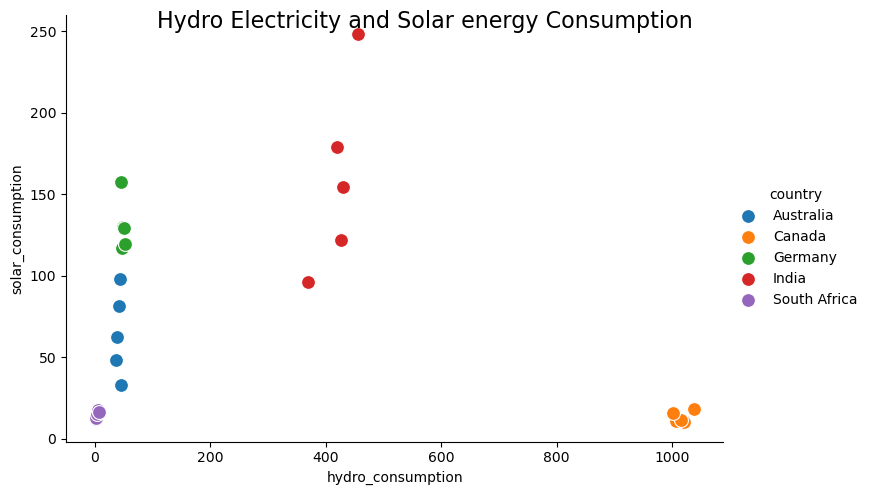

In [9]:
g = sns.FacetGrid(rows_df, hue='country', height=5, aspect=1.5)
g.map(sns.scatterplot, 'hydro_consumption', 'solar_consumption', s=100)
g.add_legend()
g.fig.suptitle("Hydro Electricity and Solar energy Consumption", fontsize=16)
plt.show()

# Plot for the hydroelectricity consumption per year over few selected countries

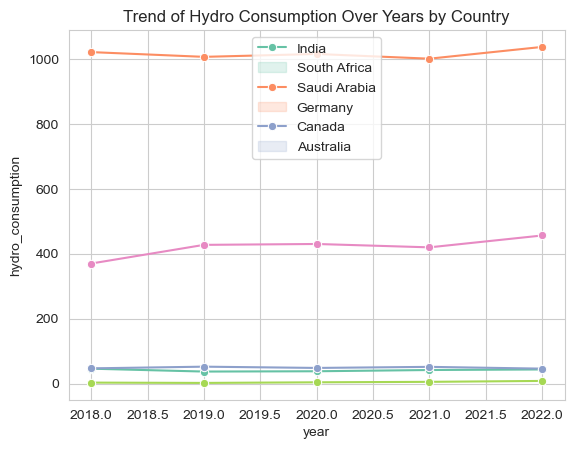

In [11]:
sns.set_style("whitegrid")

sns.lineplot(data=rows_df, x='year', y='hydro_consumption', hue='country', marker='o', palette='Set2')
plt.title("Trend of Hydro Consumption Over Years by Country")
plt.legend(labels=selected_countries)
plt.show()

# Plot for the solar energy consumption per year over few selected countries

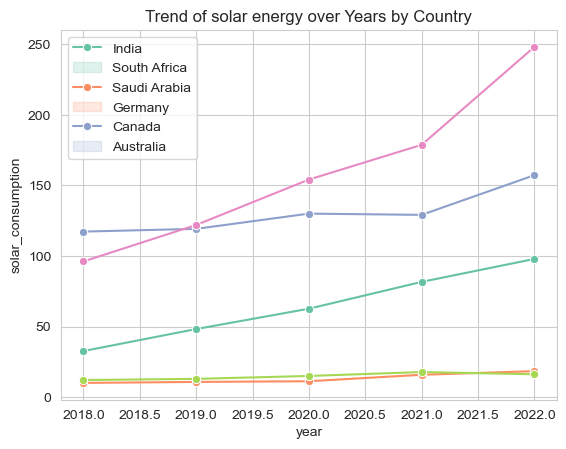

In [13]:
sns.set_style("whitegrid")
sns.lineplot(data=rows_df, x='year', y='solar_consumption', hue='country', marker='o', palette='Set2')
plt.title("Trend of solar energy over Years by Country")
plt.legend(labels=selected_countries)
plt.show()

### Distribution of solar energy in Asia

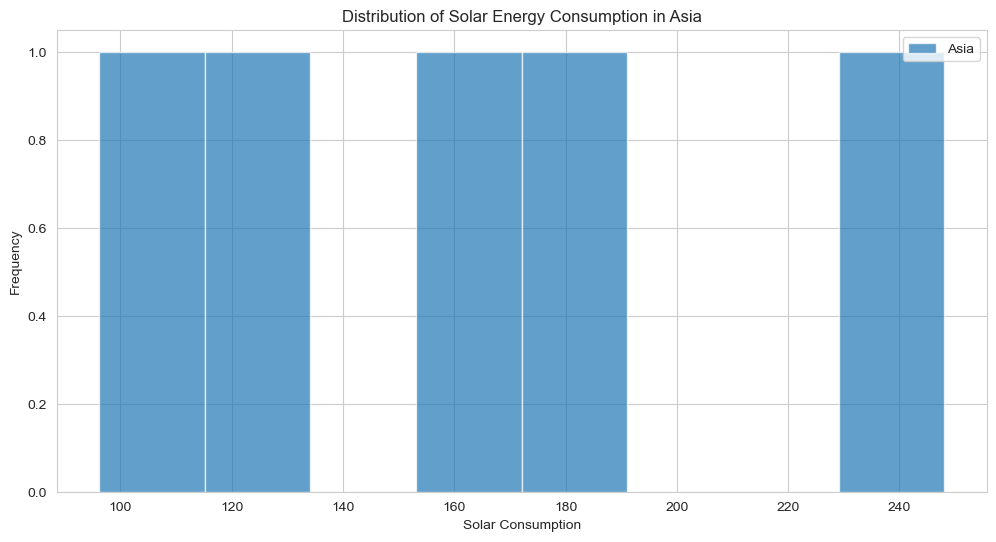

In [15]:
Asia_df = rows_df[rows_df['country'].str.contains('Asia|India|China|Japan|South Korea|Indonesia|Saudi Arabia', case=False)]


plt.figure(figsize=(12, 6))  
plt.hist(Asia_df['solar_consumption'], bins=8, label='Asia', alpha=0.7)
plt.xlabel('Solar Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Solar Energy Consumption in Asia')
plt.legend()
plt.show()

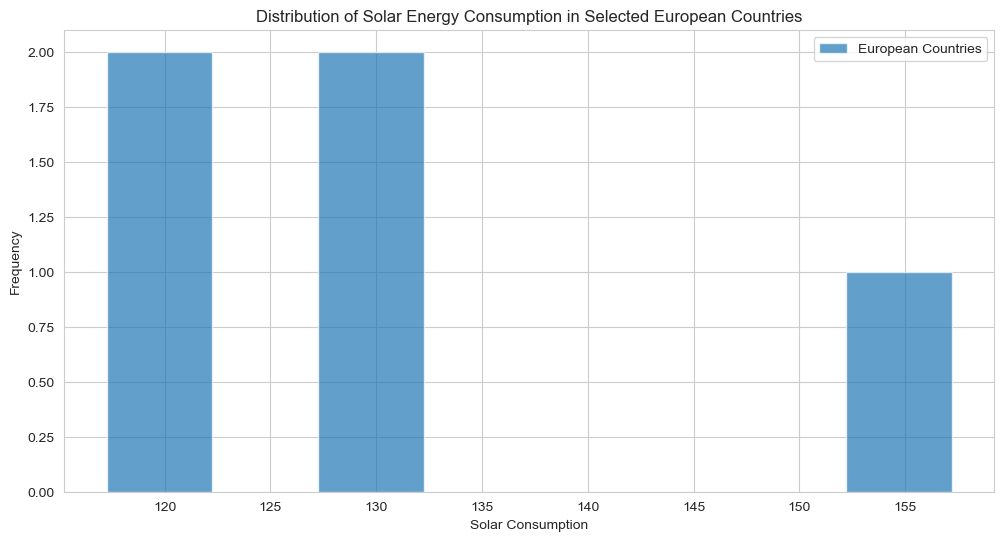

In [16]:
import matplotlib.pyplot as plt

european_countries = ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain']
Europe_df = rows_df[rows_df['country'].isin(european_countries)]
if Europe_df.empty:
    print("No data available for the selected countries in Europe.")
else:
    plt.figure(figsize=(12, 6)) 
    plt.hist(Europe_df['solar_consumption'], bins=8, label='European Countries', alpha=0.7)
    plt.xlabel('Solar Consumption')
    plt.ylabel('Frequency')
    plt.title('Distribution of Solar Energy Consumption in Selected European Countries')
    plt.legend()
    plt.show()


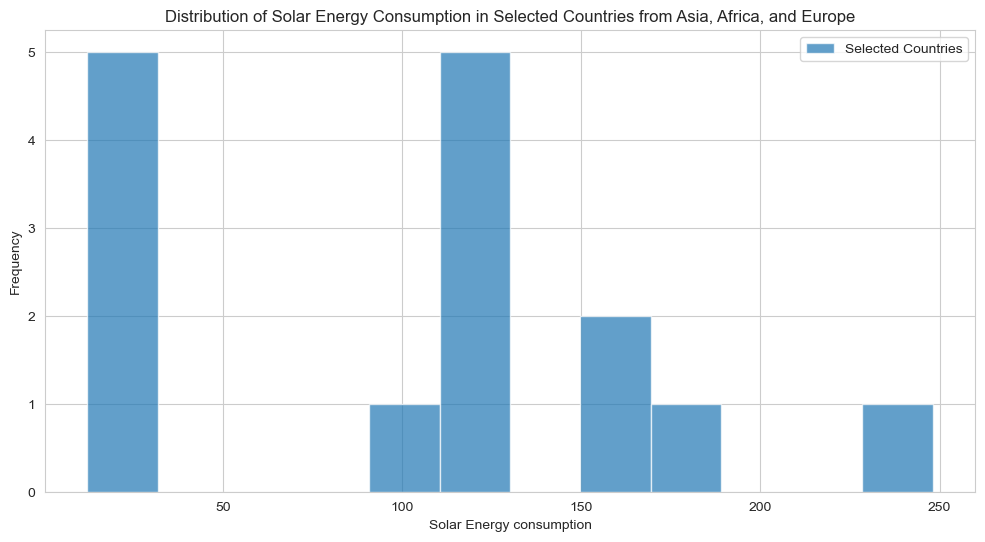

In [17]:

# Lists of countries from Asia, Africa, and Europe
asian_countries = ['India', 'China', 'Japan', 'South Korea', 'Indonesia']
african_countries = ['Nigeria', 'South Africa', 'Kenya', 'Egypt', 'Ethiopia']
european_countries = ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain']

combined_countries = asian_countries + african_countries + european_countries
combined_df = rows_df[rows_df['country'].isin(combined_countries)]
if combined_df.empty:
    print("No data available for the selected countries in Asia, Africa, and Europe.")
else:
    plt.figure(figsize=(12, 6)) 
    plt.hist(combined_df['solar_consumption'], bins=12, label='Selected Countries', alpha=0.7)
    plt.xlabel('Solar Energy consumption')
    plt.ylabel('Frequency')
    plt.title('Distribution of Solar Energy Consumption in Selected Countries from Asia, Africa, and Europe')
    plt.legend()
   


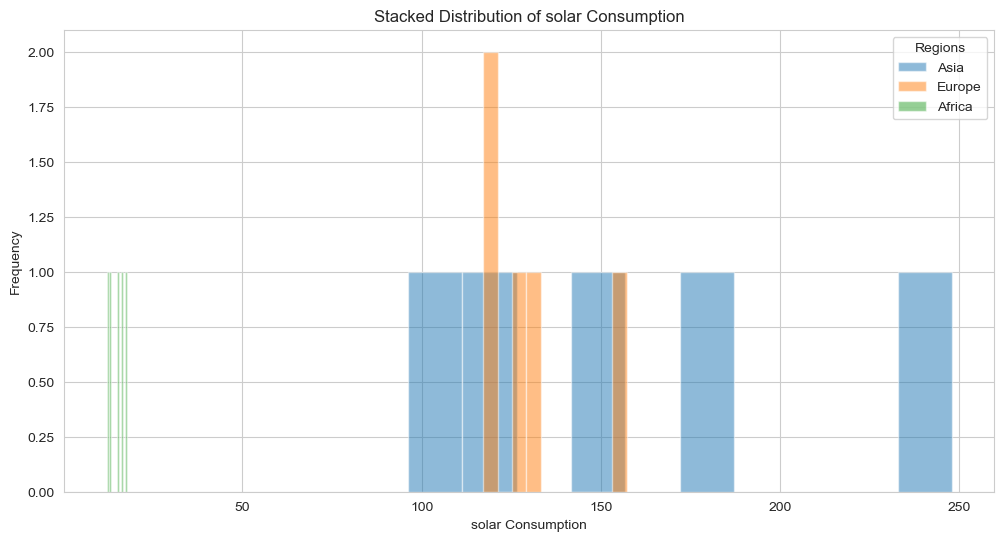

In [47]:
plt.figure(figsize=(12, 6))

bins = 10 
african_countries = ['Nigeria', 'South Africa', 'Kenya', 'Egypt', 'Ethiopia']
Africa_df = rows_df[rows_df['country'].isin(african_countries)]
#  stacked histograms
plt.hist(Asia_df['solar_consumption'], bins=bins, alpha=0.5, label='Asia', stacked=True)
plt.hist(Europe_df['solar_consumption'], bins=bins, alpha=0.5, label='Europe', stacked=True)
plt.hist(Africa_df['solar_consumption'], bins=bins, alpha=0.5, label='Africa', stacked=True)

plt.legend(title='Regions')
plt.xlabel('solar Consumption')
plt.ylabel('Frequency')
plt.title('Stacked Distribution of solar Consumption')
plt.show()

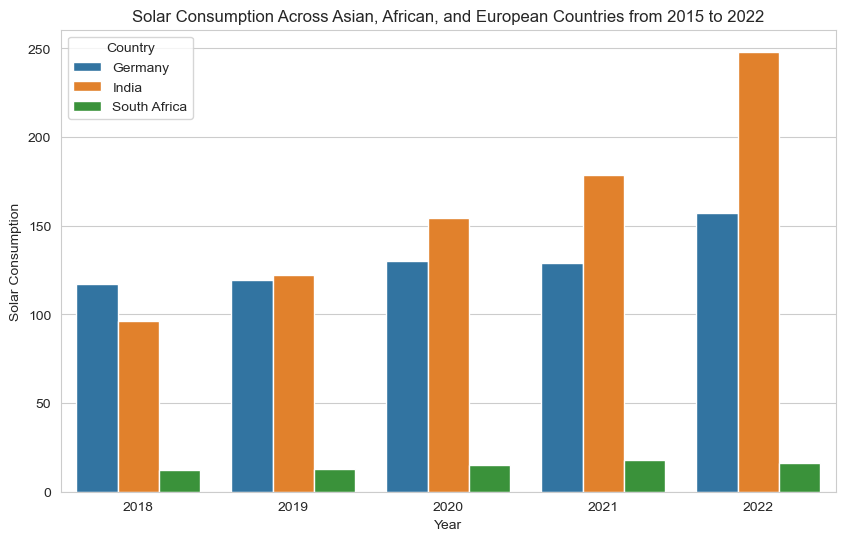

In [41]:

asian_countries = ['India', 'China', 'Japan', 'South Korea', 'Indonesia']
african_countries = ['Nigeria', 'South Africa', 'Kenya', 'Egypt', 'Ethiopia']
european_countries = ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain']

combined_countries = asian_countries + african_countries + european_countries

subset_df = rows_df[rows_df['country'].isin(combined_countries)]

# Create the barplot for 'solar consumption'
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='solar_consumption', hue='country', data=subset_df)

plt.title('Solar Consumption Across Asian, African, and European Countries from 2015 to 2022')
plt.xlabel('Year')
plt.ylabel('Solar Consumption')
plt.legend(title='Country', loc='upper left') 
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


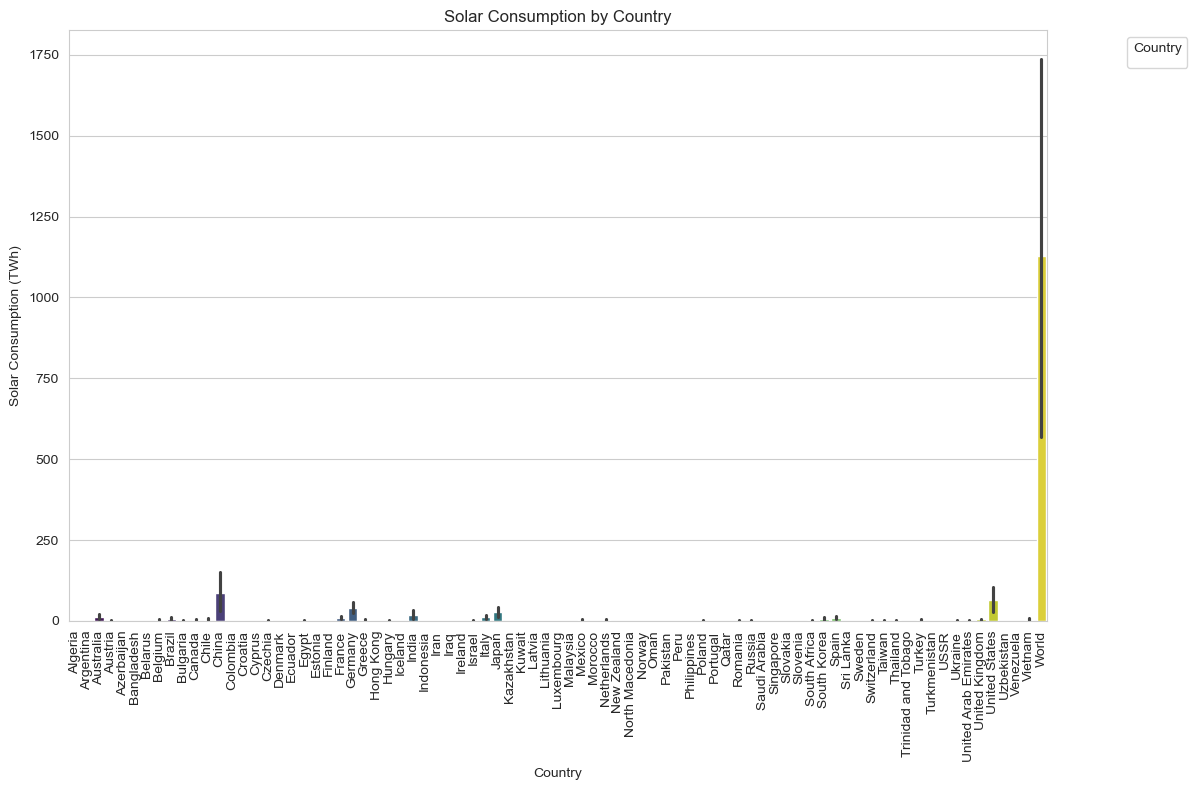

In [43]:

dataset_filtered = df[df['gdp'].notna() & df['solar_consumption'].notna()]

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=dataset_filtered, x='country', y='solar_consumption', hue='country', ax=ax, palette='viridis')

ax.set_title('Solar Consumption by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Solar Consumption (TWh)')
plt.xticks(rotation=90)  
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()
